# Using RegFormer for Drug Response Prediction

In this tutorial, we will demonstrate how to train RegFormer model for the drug response prediction task.

## 1. Execute the code

In [1]:
import sys
sys.path.insert(0, "/home/share/huadjyin/home/s_huluni/project/RegFormer")

from downstream_task.regformer_drug import DrugTaskMamba
config_file = "drug_10k.toml"
task = DrugTaskMamba(config_file)
task.run()

Save to /home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/drug/saves/drug_10k
Save to /home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/drug/saves/drug_10k
107446 instances across 561 cell lines and 223 drugs were generated.
scMamba - INFO - Resume model from /home/share/huadjyin/home/s_huluni/project/RegFormer/case/02_pretrain/models/Pretraining/cellxgene/mamba/pt_graph_sort_avg_pool_all_length/best_model.pt, the model args will override the config /home/share/huadjyin/home/s_huluni/project/RegFormer/case/02_pretrain/models/Pretraining/cellxgene/mamba/pt_graph_sort_avg_pool_all_length/args.json.
scMamba - INFO - match 690/697 genes in vocabulary of size 60698.
scMamba - INFO - ✅ Normalized data saved to layers['X_normed']
scMamba - INFO - 📝 Pre-log data saved to layers['X_log1p']
scMamba - INFO - 🎲 Binning with 51 bins ...
scMamba - INFO - ✅ Binned data saved to layers['X_binned']


/home/share/huadjyin/home/s_huluni/project/RegFormer/regformer/data/preprocess.py:130: ImplicitModificationWarning: Setting element `.layers['X_normed']` of view, initializing view as actual.
  adata.layers[self.result_normed_key] = adata.X


scMamba - INFO - train set number of samples: 561, 
	 feature length: 10000
Ratio of masked values in train:  0.0000
>>> Init parameters:
ntoken = 60698
d_model = 512
nlayers = 10
nlayers_cls = 3
device = cuda:3
ssm_cfg = None
norm_epsilon = 1e-05
rms_norm = False
fused_add_norm = False
residual_in_fp32 = False
initializer_cfg = None
n_cls = 1
vocab = GeneVocab()
dropout = 0.2
pad_token = <pad>
pad_value = -2
do_mvc = True
do_dab = False
do_cce = False
use_batch_labels = False
num_batch_labels = None
domain_spec_batchnorm = False
input_emb_style = continuous
n_input_bins = 51
cell_emb_style = avg-pool
mvc_decoder_style = inner product
ecs_threshold = 0.3
explicit_zero_prob = False
pre_norm = False
do_pretrain = True
topo_graph = True
init_layer_scale = None
if_bimamba = False
bimamba_type = none
do_pert = False
pert_pad_id = 2
token_emb_freeze = False
only_value_emb = False
bin_cls = False
bin_nums = 51
use_transformer = False
Using simple batchnorm instead of domain specific batchnorm

Embedding: 100%|██████████| 71/71 [00:07<00:00,  9.19it/s]

scMamba - INFO - Embedding size: (561, 512)


Data split.
Feature Extracting ...


100%|██████████| 89585/89585 [03:39<00:00, 408.76it/s]


Feature Extracting ...


100%|██████████| 4729/4729 [00:12<00:00, 372.52it/s]


Test data saved to /home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/drug/saves/drug_10k/data/test_data/test_data.pth
scMamba - INFO - | epoch 0 | batch 0 | loss 11.9173 | pcc 0.1908
scMamba - INFO - | epoch 0 | batch 500 | loss 5.7853 | pcc 0.5713
scMamba - INFO - | epoch 0 | batch 1000 | loss 3.1527 | pcc 0.6193
scMamba - INFO - [Epoch 0] Loss 5.0502 | PCC 0.5593 
scMamba - INFO - | epoch 1 | batch 0 | loss 3.2413 | pcc 0.7199
scMamba - INFO - | epoch 1 | batch 500 | loss 4.5189 | pcc 0.7184
scMamba - INFO - | epoch 1 | batch 1000 | loss 3.3865 | pcc 0.7971
scMamba - INFO - [Epoch 1] Loss 2.9448 | PCC 0.7776 
scMamba - INFO - | epoch 2 | batch 0 | loss 2.9197 | pcc 0.7389
scMamba - INFO - | epoch 2 | batch 500 | loss 1.9136 | pcc 0.8590
scMamba - INFO - | epoch 2 | batch 1000 | loss 2.2469 | pcc 0.7711
scMamba - INFO - [Epoch 2] Loss 2.5923 | PCC 0.8067 
scMamba - INFO - | epoch 3 | batch 0 | loss 2.1373 | pcc 0.8277
scMamba - INFO - | epoch 3 | batch 500 | loss 2.9

## 2. Inspect and Analyze Results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Define the path to the directory containing your result files
results_dir = "/home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/drug/saves/drug_10k"

# Configure plot styles
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

In [3]:
# --- 1. Load the Final Test Results ---
csv_path = os.path.join(results_dir, "random_test.csv")

if os.path.exists(csv_path):
    print(f"Loading test results from {csv_path}...")

    # The script saves the CSV without a header, so we must provide column names.
    try:
        results_df = pd.read_csv(csv_path, header=None, names=['Loss', 'PCC', 'Spearman'])

        # Add an index for each test run, in case the file contains multiple results
        results_df.index.name = 'Test Run'
        results_df.reset_index(inplace=True)

        print("\n--- Model Performance on Test Set ---")
        display(results_df)

    except pd.errors.EmptyDataError:
        print("⚠️ Warning: The results file 'random_test.csv' is empty.")
        results_df = pd.DataFrame() # Create an empty df to avoid errors later

else:
    print(f"❌ Error: The 'random_test.csv' file was not found in the specified directory.")
    results_df = pd.DataFrame() # Create an empty df to avoid errors later

Loading test results from /home/share/huadjyin/home/s_huluni/project/RegFormer/case/tutorials/drug/saves/drug_10k/random_test.csv...

--- Model Performance on Test Set ---


,Test Run,Loss,PCC,Spearman
0,0,1.3429,0.9076,0.8822
1,1,1.3595,0.9093,0.8841


/home/share/huadjyin/home/s_huluni/anaconda3/envs/py39_torch/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/share/huadjyin/home/s_huluni/anaconda3/envs/py39_torch/lib/python3.9/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


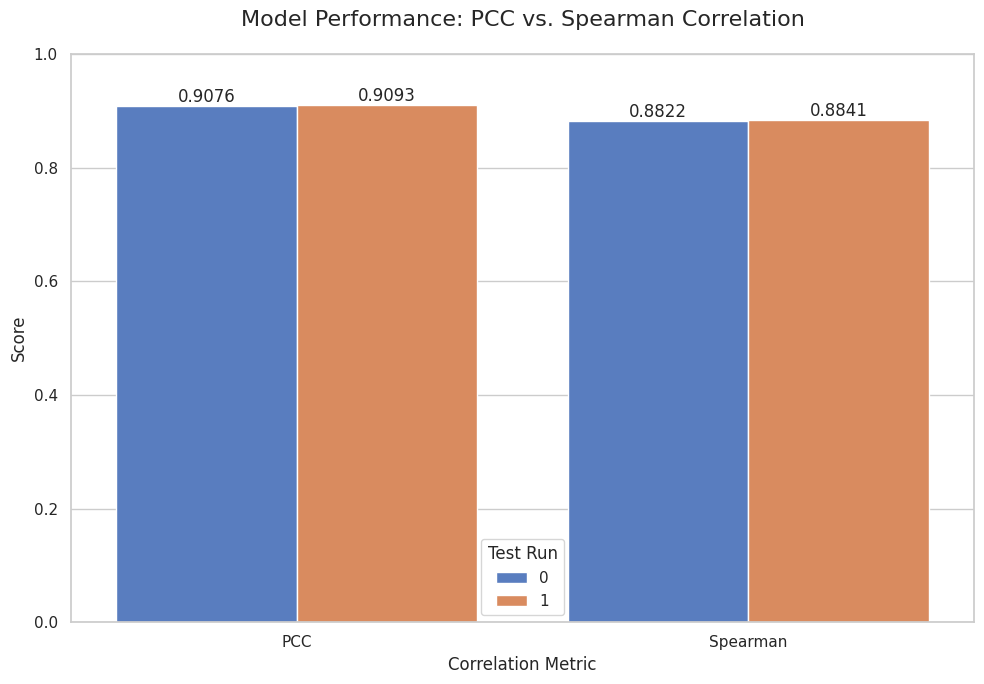

In [4]:
# --- 2. Visualize the Key Performance Metrics ---

if not results_df.empty:
    # Melt the DataFrame to prepare it for easy plotting with Seaborn
    # We focus on PCC (Pearson) and Spearman correlation coefficients
    plot_df = results_df.melt(
        id_vars=['Test Run'],
        value_vars=['PCC', 'Spearman'],
        var_name='Metric',
        value_name='Score'
    )

    plt.figure(figsize=(10, 7))
    ax = sns.barplot(data=plot_df, x='Metric', y='Score', hue='Test Run', palette='muted')

    # Add score labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f')

    ax.set_ylim(0, max(1.0, plot_df['Score'].max() * 1.1)) # Adjust y-axis limit
    ax.set_title('Model Performance: PCC vs. Spearman Correlation', fontsize=16, pad=20)
    ax.set_xlabel('Correlation Metric', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)

    # If there is only one test run, hide the legend
    if len(results_df) == 1:
        ax.get_legend().remove()

    plt.tight_layout()
    plt.show()
else:
    print("Cannot generate plot because no results were loaded.")